# R

## Packages and Graphics

## TidyData
- There are many ways to represent data in a data frame, and due to the history of R, almost all of them are use
- Recently there has been a push to create commonsense conventions, known as having "Tidy Data"
- Hadley Wickham (Major player in R and the tidy data movement) defines tidy data as 
    - Each variable is in a column.
    - Each observation is a row.
    - Each value is a cell.


## TidyR
- To promote and enable this, the package TidyR was released
- It was spawned an entire family of packages, collectively known as the tidyverse
    - You can install just tidyR by using install.packages('tidyR')
    - The entire family can be installed with install.packages('tidyverse')
- It contains many functions meant to manipulate data into a tidy form

## The Pipe Operator
- `TidyR` is commonly presented using the operator `%>%`, which comes from an earlier package, `magrittr`
    - It is very similar to the pipe in bash, passing the output of one function as the first argument to the next function
    - The following are eqiuvalent
    
```R
apply(data,1,function)
      
data %>% apply(1,function)
```

## Spreading
- The `spread` function converts from long data to wide data
- The syntax of the `spread` function is
```R
    spread(data,key,value)
```
    - Key is the column you want to use to form your new columns
    - Value is the column you want to use to fill the cells

In [2]:
library(DSR)
long <- table2
extra_wide_cases <- table4
combined <- table5
print(table2)

       country year        key      value
1  Afghanistan 1999      cases        745
2  Afghanistan 1999 population   19987071
3  Afghanistan 2000      cases       2666
4  Afghanistan 2000 population   20595360
5       Brazil 1999      cases      37737
6       Brazil 1999 population  172006362
7       Brazil 2000      cases      80488
8       Brazil 2000 population  174504898
9        China 1999      cases     212258
10       China 1999 population 1272915272
11       China 2000      cases     213766
12       China 2000 population 1280428583


In [3]:
library(tidyr)
print(as.data.frame(spread(long,key,value)))


Attaching package: ‘tidyr’

The following objects are masked from ‘package:DSR’:

    table1, table2, table3, table5, who



      country year  cases population
1 Afghanistan 1999    745   19987071
2 Afghanistan 2000   2666   20595360
3      Brazil 1999  37737  172006362
4      Brazil 2000  80488  174504898
5       China 1999 212258 1272915272
6       China 2000 213766 1280428583


## Gathering
- Gathering is the opposite of spread
    - While it is uncommon to need this, it is possible someone made a data frame where not every column is a variable, and you need to collapse things a bit
```R
    gather(data, COLUMN_NAME1, COLUMN_NAME2, cols_to_gather)
```

In [5]:
#print(extra_wide_cases)
gathered_cases <- extra_wide_cases %>% gather("Year","Cases",2:3)
print(gathered_cases)

# A tibble: 6 x 3
      country  Year  Cases
       <fctr> <chr>  <int>
1 Afghanistan  1999    745
2      Brazil  1999  37737
3       China  1999 212258
4 Afghanistan  2000   2666
5      Brazil  2000  80488
6       China  2000 213766


## Separating and Uniting
- Separating and Uniting allows us to create multiple columns from one, or bring together columns that should never has been separated
```R
    separate(data,col_to_separate,new_columns)
    unite(data,col_to_add, from_columns)
```

In [13]:
print(table5)
all_good <- table5 %>% unite("year",c("century","year"),sep="") %>%
separate("rate",c("cases",'population'),sep="/")
print(all_good)

# A tibble: 6 x 4
      country century  year              rate
*       <chr>   <chr> <chr>             <chr>
1 Afghanistan      19    99      745/19987071
2 Afghanistan      20    00     2666/20595360
3      Brazil      19    99   37737/172006362
4      Brazil      20    00   80488/174504898
5       China      19    99 212258/1272915272
6       China      20    00 213766/1280428583
# A tibble: 6 x 4
      country  year  cases population
*       <chr> <chr>  <chr>      <chr>
1 Afghanistan  1999    745   19987071
2 Afghanistan  2000   2666   20595360
3      Brazil  1999  37737  172006362
4      Brazil  2000  80488  174504898
5       China  1999 212258 1272915272
6       China  2000 213766 1280428583


## DplyR
- DplyR is another package in the tidyverse
    - Improves upon earlier packaged named `plyr`, which allowed easy manipulation of data
    - Specifically designed to use with data frames
- Just like TidyR, commonly uses pipes
- All functions are verbs


## Selecting Data
- DplyR contains two functions to select data
    - Select selects columns/variables
    - Filter selects rows/observations
- Both of these can take a list of names, but they are more useful with built-in functions in DplyR
    - endsWith
    - startsWith
    - contains
    - one_of

In [53]:
library(dplyr)
starwars <- as.data.frame(starwars)
row.names(starwars) <- starwars$name
head(starwars)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,films,vehicles,starships
Luke Skywalker,Luke Skywalker,172,77,blond,fair,blue,19.0,male,Tatooine,Human,"Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope , The Force Awakens","Snowspeeder , Imperial Speeder Bike","X-wing , Imperial shuttle"
C-3PO,C-3PO,167,75,NA,gold,yellow,112.0,NA,Tatooine,Droid,"Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope",,
R2-D2,R2-D2,96,32,NA,"white, blue",red,33.0,NA,Naboo,Droid,"Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope , The Force Awakens",,
Darth Vader,Darth Vader,202,136,none,white,yellow,41.9,male,Tatooine,Human,"Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope",,TIE Advanced x1
Leia Organa,Leia Organa,150,49,brown,light,brown,19.0,female,Alderaan,Human,"Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope , The Force Awakens",Imperial Speeder Bike,
Owen Lars,Owen Lars,178,120,"brown, grey",light,blue,52.0,male,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,


In [15]:
## Standard Boring Select
select(starwars,hair_color,skin_color, eye_color)

,hair_color,skin_color,eye_color
Luke Skywalker,blond,fair,blue
C-3PO,NA,gold,yellow
R2-D2,NA,"white, blue",red
Darth Vader,none,white,yellow
Leia Organa,brown,light,brown
Owen Lars,"brown, grey",light,blue
Beru Whitesun lars,brown,light,blue
R5-D4,NA,"white, red",red
Biggs Darklighter,black,light,brown
Obi-Wan Kenobi,"auburn, white",fair,blue-gray


In [16]:
##  Select with Pipes and Ends_with
starwars %>% select(ends_with('color'))

,hair_color,skin_color,eye_color
Luke Skywalker,blond,fair,blue
C-3PO,NA,gold,yellow
R2-D2,NA,"white, blue",red
Darth Vader,none,white,yellow
Leia Organa,brown,light,brown
Owen Lars,"brown, grey",light,blue
Beru Whitesun lars,brown,light,blue
R5-D4,NA,"white, red",red
Biggs Darklighter,black,light,brown
Obi-Wan Kenobi,"auburn, white",fair,blue-gray


In [24]:
starwars %>% select(-name)

,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,films,vehicles,starships
Luke Skywalker,172,77.0,blond,fair,blue,19.0,male,Tatooine,Human,"Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope , The Force Awakens","Snowspeeder , Imperial Speeder Bike","X-wing , Imperial shuttle"
C-3PO,167,75.0,NA,gold,yellow,112.0,NA,Tatooine,Droid,"Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope",,
R2-D2,96,32.0,NA,"white, blue",red,33.0,NA,Naboo,Droid,"Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope , The Force Awakens",,
Darth Vader,202,136.0,none,white,yellow,41.9,male,Tatooine,Human,"Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope",,TIE Advanced x1
Leia Organa,150,49.0,brown,light,brown,19.0,female,Alderaan,Human,"Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope , The Force Awakens",Imperial Speeder Bike,
Owen Lars,178,120.0,"brown, grey",light,blue,52.0,male,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,
Beru Whitesun lars,165,75.0,brown,light,blue,47.0,female,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,
R5-D4,97,32.0,NA,"white, red",red,NA,NA,Tatooine,Droid,A New Hope,,
Biggs Darklighter,183,84.0,black,light,brown,24.0,male,Tatooine,Human,A New Hope,,X-wing
Obi-Wan Kenobi,182,77.0,"auburn, white",fair,blue-gray,57.0,male,Stewjon,Human,"Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope",Tribubble bongo,"Jedi starfighter , Trade Federation cruiser, Naboo star skiff , Jedi Interceptor , Belbullab-22 starfighter"


In [25]:
starwars %>% filter(species != "Human")

name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,films,vehicles,starships
C-3PO,167,75.0,NA,gold,yellow,112,NA,Tatooine,Droid,"Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope",,
R2-D2,96,32.0,NA,"white, blue",red,33,NA,Naboo,Droid,"Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope , The Force Awakens",,
R5-D4,97,32.0,NA,"white, red",red,NA,NA,Tatooine,Droid,A New Hope,,
Chewbacca,228,112.0,brown,unknown,blue,200,male,Kashyyyk,Wookiee,"Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope , The Force Awakens",AT-ST,"Millennium Falcon, Imperial shuttle"
Greedo,173,74.0,NA,green,black,44,male,Rodia,Rodian,A New Hope,,
Jabba Desilijic Tiure,175,1358.0,NA,"green-tan, brown",orange,600,hermaphrodite,Nal Hutta,Hutt,"The Phantom Menace, Return of the Jedi, A New Hope",,
Yoda,66,17.0,white,green,brown,896,male,NA,Yoda's species,"Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , The Empire Strikes Back",,
IG-88,200,140.0,none,metal,red,15,none,NA,Droid,The Empire Strikes Back,,
Bossk,190,113.0,none,green,red,53,male,Trandosha,Trandoshan,The Empire Strikes Back,,
Ackbar,180,83.0,none,brown mottle,orange,41,male,Mon Cala,Mon Calamari,"Return of the Jedi, The Force Awakens",,


In [26]:
starwars %>% filter(species %in% c('Wookiee','Ewok'))

name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,films,vehicles,starships
Chewbacca,228,112,brown,unknown,blue,200,male,Kashyyyk,Wookiee,"Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope , The Force Awakens",AT-ST,"Millennium Falcon, Imperial shuttle"
Wicket Systri Warrick,88,20,brown,brown,brown,8,male,Endor,Ewok,Return of the Jedi,,
Tarfful,234,136,brown,brown,blue,NA,male,Kashyyyk,Wookiee,Revenge of the Sith,,


## Selection Practice
- Print the names and planets of all characters who have a birth year of less than 50

## Adding or Changing Variables
- The `mutate` and `transmute` functions are used to add new variables as well as update existing ones
    - `mutate` does not drop old variables
    - `transmute` drops everything except those in the function call

In [34]:
starwars %>% mutate( height_inches = height * 0.393701)

name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,films,vehicles,starships,height_inches
Luke Skywalker,172,77.0,blond,fair,blue,19.0,male,Tatooine,Human,"Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope , The Force Awakens","Snowspeeder , Imperial Speeder Bike","X-wing , Imperial shuttle",67.71657
C-3PO,167,75.0,NA,gold,yellow,112.0,NA,Tatooine,Droid,"Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope",,,65.74807
R2-D2,96,32.0,NA,"white, blue",red,33.0,NA,Naboo,Droid,"Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope , The Force Awakens",,,37.79530
Darth Vader,202,136.0,none,white,yellow,41.9,male,Tatooine,Human,"Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope",,TIE Advanced x1,79.52760
Leia Organa,150,49.0,brown,light,brown,19.0,female,Alderaan,Human,"Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope , The Force Awakens",Imperial Speeder Bike,,59.05515
Owen Lars,178,120.0,"brown, grey",light,blue,52.0,male,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,,70.07878
Beru Whitesun lars,165,75.0,brown,light,blue,47.0,female,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,,64.96067
R5-D4,97,32.0,NA,"white, red",red,NA,NA,Tatooine,Droid,A New Hope,,,38.18900
Biggs Darklighter,183,84.0,black,light,brown,24.0,male,Tatooine,Human,A New Hope,,X-wing,72.04728
Obi-Wan Kenobi,182,77.0,"auburn, white",fair,blue-gray,57.0,male,Stewjon,Human,"Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope",Tribubble bongo,"Jedi starfighter , Trade Federation cruiser, Naboo star skiff , Jedi Interceptor , Belbullab-22 starfighter",71.65358


In [35]:
starwars %>% transmute( height_inches = height * 0.393701)

height_inches
67.71657
65.74807
37.79530
79.52760
59.05515
70.07878
64.96067
38.18900
72.04728
71.65358


In [28]:
starwars %>% filter(species %in% c('Wookiee','Ewok')) %>%
mutate( height = height * 0.393701)

name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,films,vehicles,starships
Chewbacca,89.76383,112,brown,unknown,blue,200,male,Kashyyyk,Wookiee,"Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope , The Force Awakens",AT-ST,"Millennium Falcon, Imperial shuttle"
Wicket Systri Warrick,34.64569,20,brown,brown,brown,8,male,Endor,Ewok,Return of the Jedi,,
Tarfful,92.12603,136,brown,brown,blue,NA,male,Kashyyyk,Wookiee,Revenge of the Sith,,


## Summarizing and Counting
- In general, to perform an action over a dataframe, use the summarize function
    - `summarize` takes in as its parameters other functions that do the calculations
    - The parameters to these inner functions should be the columns you want summarized
    - Multiple summaries can be computed with one call to `summarize`
- If all you want to do is count the frequency of values in certain column, use the `count` function and pass a column to count

In [32]:
print(starwars %>% summarize(n_distinct(species)))

  n_distinct(species)
1                  38


In [33]:
species_counts <- starwars %>% count(species)
print(as.data.frame(species_counts))

          species  n
1          Aleena  1
2        Besalisk  1
3          Cerean  1
4        Chagrian  1
5        Clawdite  1
6           Droid  5
7             Dug  1
8            Ewok  1
9       Geonosian  1
10         Gungan  3
11          Human 35
12           Hutt  1
13       Iktotchi  1
14        Kaleesh  1
15       Kaminoan  2
16        Kel Dor  1
17       Mirialan  2
18   Mon Calamari  1
19           Muun  1
20       Nautolan  1
21      Neimodian  1
22         Pau'an  1
23       Quermian  1
24         Rodian  1
25        Skakoan  1
26      Sullustan  1
27     Tholothian  1
28        Togruta  1
29          Toong  1
30      Toydarian  1
31     Trandoshan  1
32        Twi'lek  2
33     Vulptereen  1
34        Wookiee  2
35          Xexto  1
36 Yoda's species  1
37         Zabrak  2
38           <NA>  5


In [29]:
species_counts <- starwars %>% count(species,sort=TRUE)
print(as.data.frame(species_counts))

          species  n
1           Human 35
2           Droid  5
3            <NA>  5
4          Gungan  3
5        Kaminoan  2
6        Mirialan  2
7         Twi'lek  2
8         Wookiee  2
9          Zabrak  2
10         Aleena  1
11       Besalisk  1
12         Cerean  1
13       Chagrian  1
14       Clawdite  1
15            Dug  1
16           Ewok  1
17      Geonosian  1
18           Hutt  1
19       Iktotchi  1
20        Kaleesh  1
21        Kel Dor  1
22   Mon Calamari  1
23           Muun  1
24       Nautolan  1
25      Neimodian  1
26         Pau'an  1
27       Quermian  1
28         Rodian  1
29        Skakoan  1
30      Sullustan  1
31     Tholothian  1
32        Togruta  1
33          Toong  1
34      Toydarian  1
35     Trandoshan  1
36     Vulptereen  1
37          Xexto  1
38 Yoda's species  1


In [30]:
species_counts <- starwars %>% count(species,homeworld,sort=TRUE)
print(as.data.frame(species_counts))

          species      homeworld n
1           Human       Tatooine 8
2           Human          Naboo 5
3           Human           <NA> 5
4          Gungan          Naboo 3
5           Human       Alderaan 3
6           Droid       Tatooine 2
7           Droid           <NA> 2
8           Human       Corellia 2
9           Human      Coruscant 2
10       Kaminoan         Kamino 2
11       Mirialan         Mirial 2
12        Twi'lek         Ryloth 2
13        Wookiee       Kashyyyk 2
14           <NA>          Naboo 2
15           <NA>           <NA> 2
16         Aleena    Aleen Minor 1
17       Besalisk           Ojom 1
18         Cerean          Cerea 1
19       Chagrian       Champala 1
20       Clawdite          Zolan 1
21          Droid          Naboo 1
22            Dug      Malastare 1
23           Ewok          Endor 1
24      Geonosian       Geonosis 1
25          Human         Bespin 1
26          Human     Bestine IV 1
27          Human      Chandrila 1
28          Human   

## Group By
- The `group_by` function allows rows to be grouped based on their values in the given columns or columns
- This makes finding averages and other summary data per group very easy
```R
group_by(data,LIST_OF_COLUMNS)
```

In [31]:
print(starwars %>% group_by(species,homeworld) %>% 
      summarize(avg_height = mean(height)))

# A tibble: 58 x 3
# Groups:   species [?]
    species   homeworld avg_height
      <chr>       <chr>      <dbl>
 1   Aleena Aleen Minor         79
 2 Besalisk        Ojom        198
 3   Cerean       Cerea        198
 4 Chagrian    Champala        196
 5 Clawdite       Zolan        168
 6    Droid       Naboo         96
 7    Droid    Tatooine        132
 8    Droid        <NA>         NA
 9      Dug   Malastare        112
10     Ewok       Endor         88
# ... with 48 more rows


In [32]:
print(starwars %>% 
                  group_by(species,homeworld) %>% 
                      summarize(avg_height = mean(height),
                                min_height=min(height)))


# A tibble: 58 x 4
# Groups:   species [?]
    species   homeworld avg_height min_height
      <chr>       <chr>      <dbl>      <dbl>
 1   Aleena Aleen Minor         79         79
 2 Besalisk        Ojom        198        198
 3   Cerean       Cerea        198        198
 4 Chagrian    Champala        196        196
 5 Clawdite       Zolan        168        168
 6    Droid       Naboo         96         96
 7    Droid    Tatooine        132         97
 8    Droid        <NA>         NA         NA
 9      Dug   Malastare        112        112
10     Ewok       Endor         88         88
# ... with 48 more rows


## GroupBy Practice
- Find the number of species on each planet

## Combining Data Tables
- The various `join` functions offer database like functionality
    - Matching rows are joined together with their columns
    - Matching is done by default on any common variables, but can be specified
- `bind_rows` and `bind_columns` offer a simpler concatenation style combination
    - Matches by position always

In [33]:
print(band_members)

# A tibble: 3 x 2
   name    band
  <chr>   <chr>
1  Mick  Stones
2  John Beatles
3  Paul Beatles


In [34]:
print(band_instruments)

# A tibble: 3 x 2
   name  plays
  <chr>  <chr>
1  John guitar
2  Paul   bass
3 Keith guitar


In [35]:
print(full_join(band_members,band_instruments))

Joining, by = "name"


# A tibble: 4 x 3
   name    band  plays
  <chr>   <chr>  <chr>
1  Mick  Stones   <NA>
2  John Beatles guitar
3  Paul Beatles   bass
4 Keith    <NA> guitar


In [36]:
print(inner_join(band_members,band_instruments))

Joining, by = "name"


# A tibble: 2 x 3
   name    band  plays
  <chr>   <chr>  <chr>
1  John Beatles guitar
2  Paul Beatles   bass


In [37]:
print(left_join(band_members,band_instruments))

Joining, by = "name"


# A tibble: 3 x 3
   name    band  plays
  <chr>   <chr>  <chr>
1  Mick  Stones   <NA>
2  John Beatles guitar
3  Paul Beatles   bass


In [38]:
print(right_join(band_members,band_instruments))

Joining, by = "name"


# A tibble: 3 x 3
   name    band  plays
  <chr>   <chr>  <chr>
1  John Beatles guitar
2  Paul Beatles   bass
3 Keith    <NA> guitar


In [39]:
print(band_instruments2)

# A tibble: 3 x 2
  artist  plays
   <chr>  <chr>
1   John guitar
2   Paul   bass
3  Keith guitar


In [43]:
print(full_join(band_members,band_instruments2,
                by=c("name" = "artist")))

# A tibble: 4 x 3
   name    band  plays
  <chr>   <chr>  <chr>
1  Mick  Stones   <NA>
2  John Beatles guitar
3  Paul Beatles   bass
4 Keith    <NA> guitar


In [44]:
print(bind_cols(band_members,band_members))

# A tibble: 3 x 4
   name    band name1   band1
  <chr>   <chr> <chr>   <chr>
1  Mick  Stones  Mick  Stones
2  John Beatles  John Beatles
3  Paul Beatles  Paul Beatles


In [46]:
print(bind_rows(band_members,band_instruments))

# A tibble: 6 x 3
   name    band  plays
  <chr>   <chr>  <chr>
1  Mick  Stones   <NA>
2  John Beatles   <NA>
3  Paul Beatles   <NA>
4  John    <NA> guitar
5  Paul    <NA>   bass
6 Keith    <NA> guitar


## ggplot2
- R has long supported creating graphs from data, but the process was often messy and confusing
- `ggplot2` is a widely used package that standardizes how graphs are created
    - Based on the Grammar of Graphics, a language independent theory on how graphs should be created
    - A very large community with lots of extensions and enhancements available
    - Works directly on data frames

## The `ggplot` function
- The `ggplot` function sets up the basics for our graph, including which data frame to use, and how to use it
```R
ggplot(data_frame,aes(AESTHETICS))
```
- Aesthetics are what we see are the graph, and are defined using data frame columns
    - x and y position
    - color
    - shape

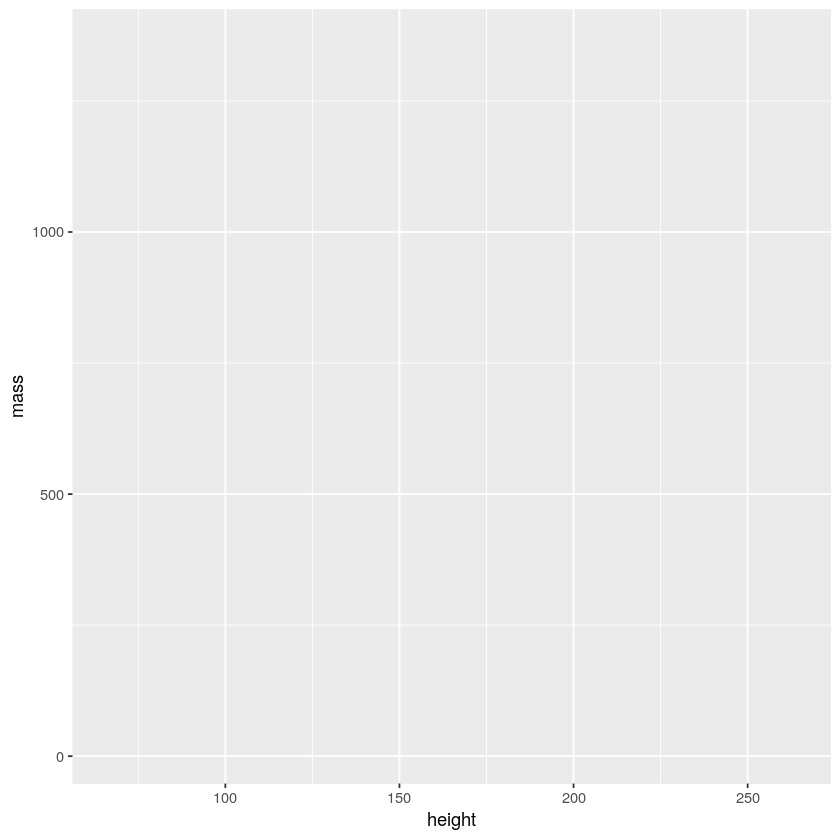

In [44]:
library(ggplot2)
ggplot(starwars,aes(x=height,y=mass))

## Geometries
- The base `ggplot` function sets up the graph and creates a ggplot object, but doesn't produce anything visually
- We need to specify how we want to display our data using geometries
    - geom_point
    - geom_boxplot
    - geom_histogram
    - geom_dist
- Geometries, and every other specification in ggplot2 is done by adding to the original ggplot call

Warning message:
“Removed 22 rows containing missing values (geom_point).”

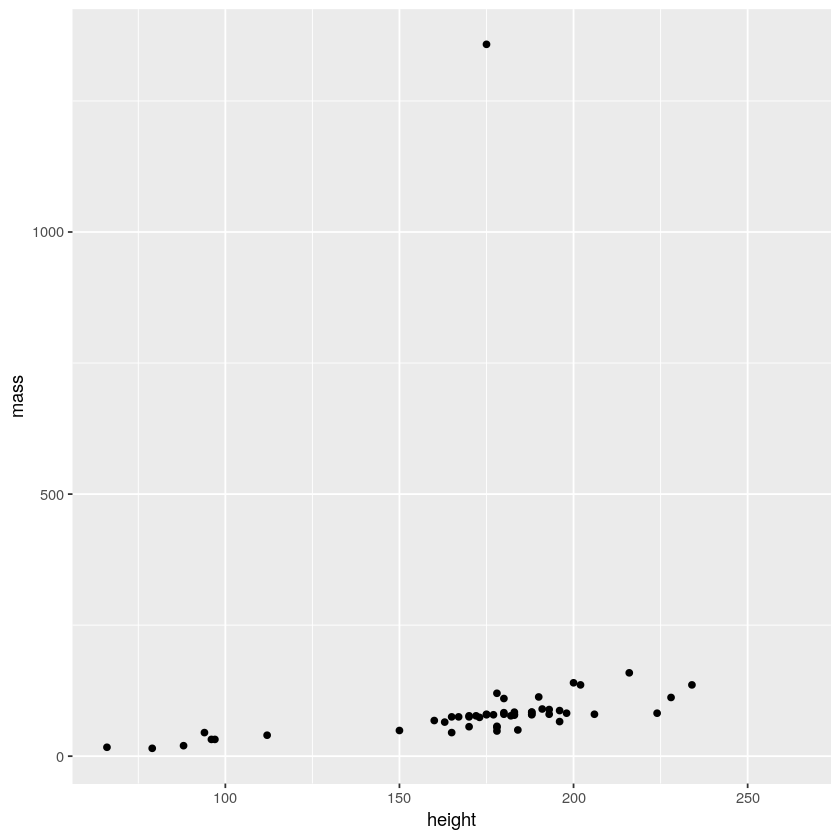

In [45]:
ggplot(starwars,aes(x=height,y=mass)) + geom_point()

ERROR while rich displaying an object: Error: stat_bin() must not be used with a y aesthetic.

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. by_layer(function(l, d) l$comp

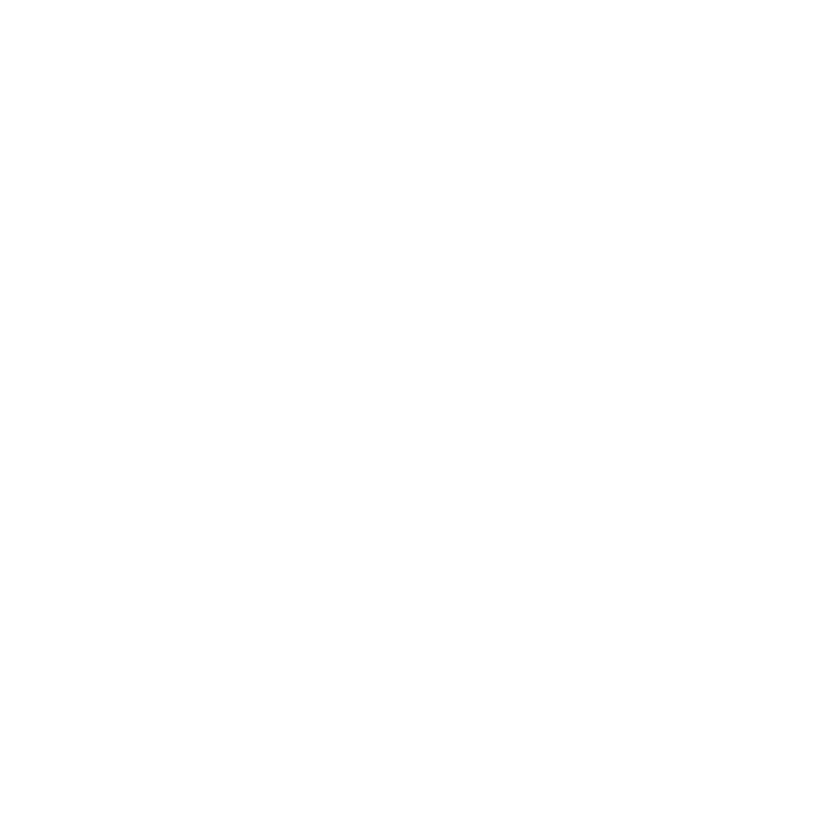

In [46]:
ggplot(starwars,aes(x=height,y=mass)) + geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 22 rows containing non-finite values (stat_bin).”

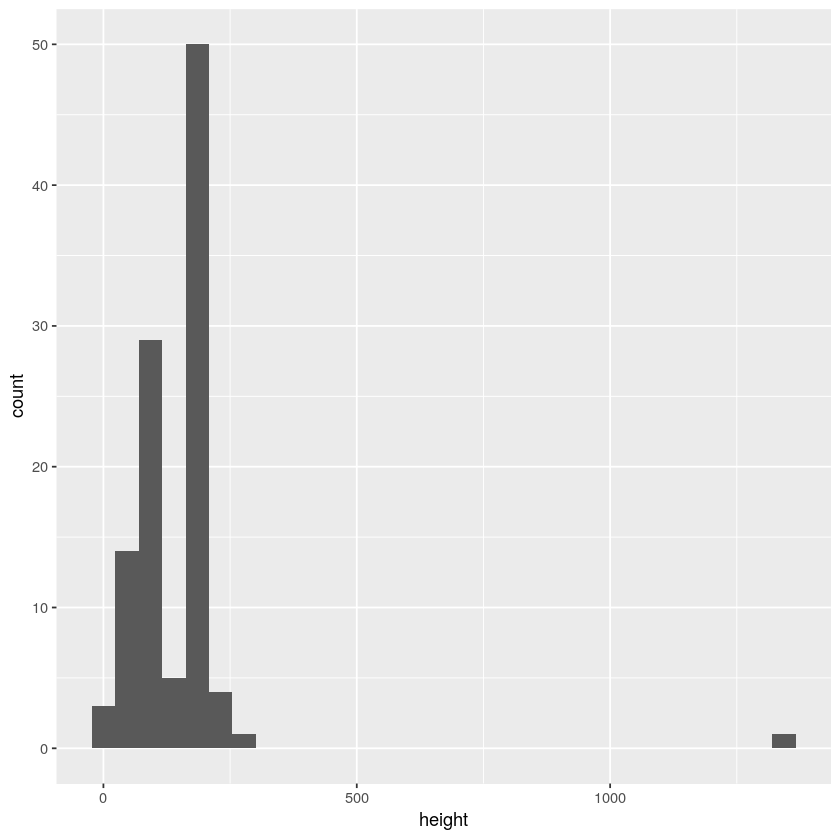

In [47]:
ggplot(starwars) + geom_histogram(aes(height)) +
geom_histogram(aes(mass))

Warning message:
“Removed 6 rows containing non-finite values (stat_density).”Warning message:
“Removed 22 rows containing non-finite values (stat_density).”

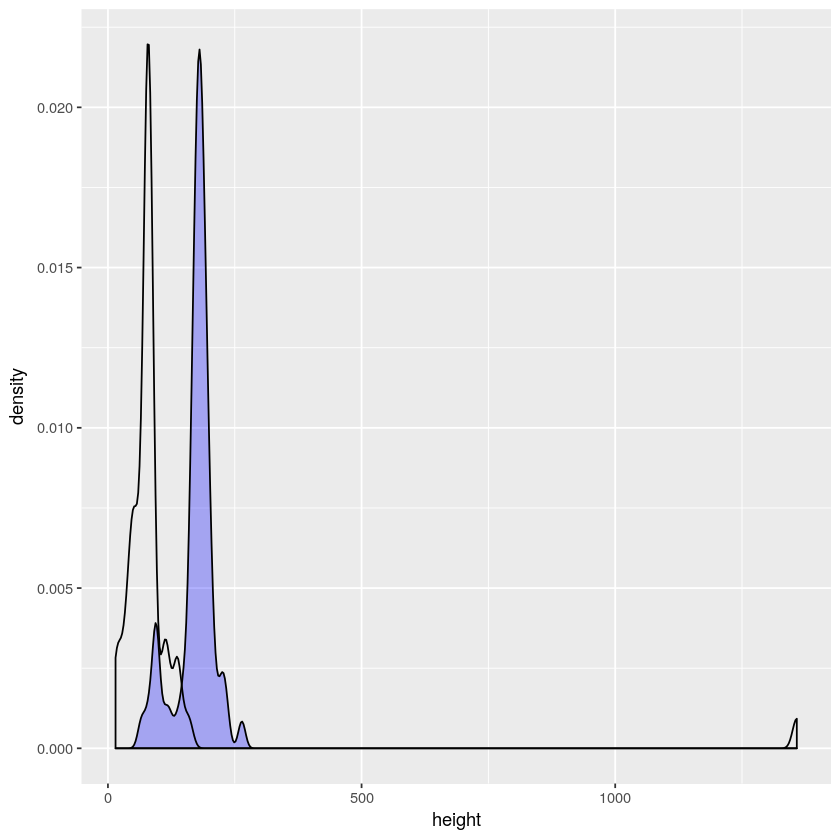

In [48]:
ggplot(starwars) + geom_density(aes(height),fill="blue",alpha=0.3) + 
geom_density(aes(mass))

Warning message:
“Removed 22 rows containing missing values (geom_point).”

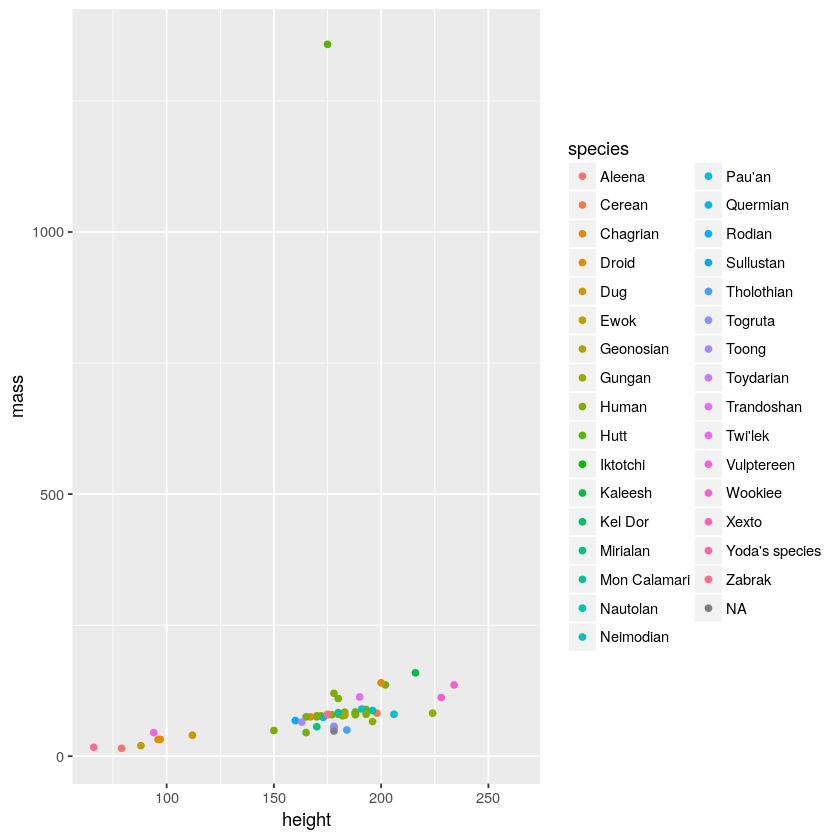

In [54]:
ggplot(starwars,aes(x=height,y=mass,color=species)) +
geom_point()

## GGplot 2 Basics Practice
- Draw a scatter plot that charts the number of species on a planet by the average age on that planet

In [56]:
interesting <- (starwars %>% 
         filter(!is.na(species)) %>%
             group_by(species) %>% 
             summarize(count = n()) %>% 
             filter(count > 2))$species
print(interesting)
to_vis <- starwars %>% 
    filter(species %in% interesting)

[1] "Droid"  "Gungan" "Human" 


Warning message:
“Removed 5 rows containing non-finite values (stat_ydensity).”

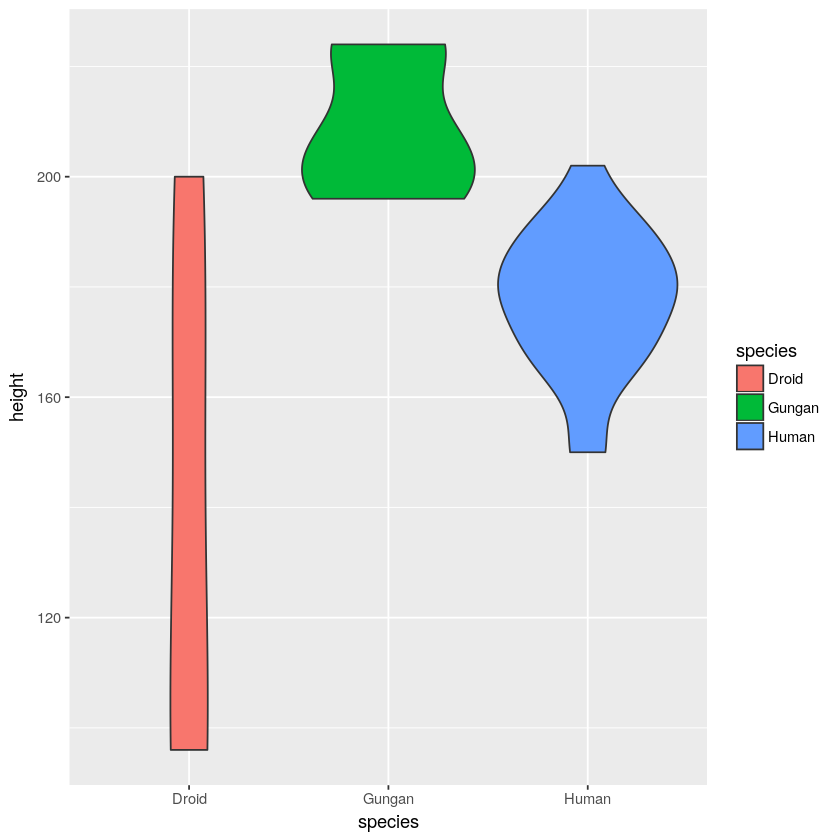

In [58]:
base_plot <- ggplot(to_vis,aes(x=species,fill=species,y=height))
base_plot + geom_violin()

## Modifying Other Aspects
- `ggplot` has a function for almost every aspect of a graphs appearance
- To add titles, use the functions
    - xlabs, ylabs, ggtitle, labs
- To modify area shown, use
    - xlim, ylim, lims
- To modify colors use one of the `scale_` functions

Warning message:
“Removed 11 rows containing missing values (geom_point).”

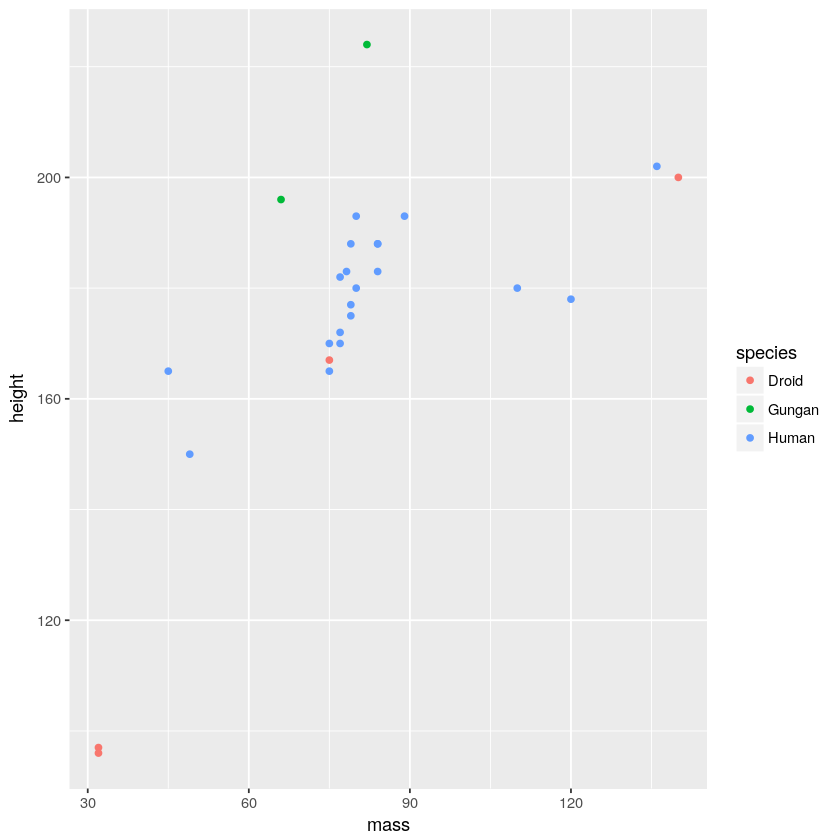

In [59]:
base_plot2 <- ggplot(to_vis,aes(x=mass,y=height,color=species))
scatter <- base_plot2 + geom_point()
plot(scatter)

Warning message:
“Removed 11 rows containing missing values (geom_point).”

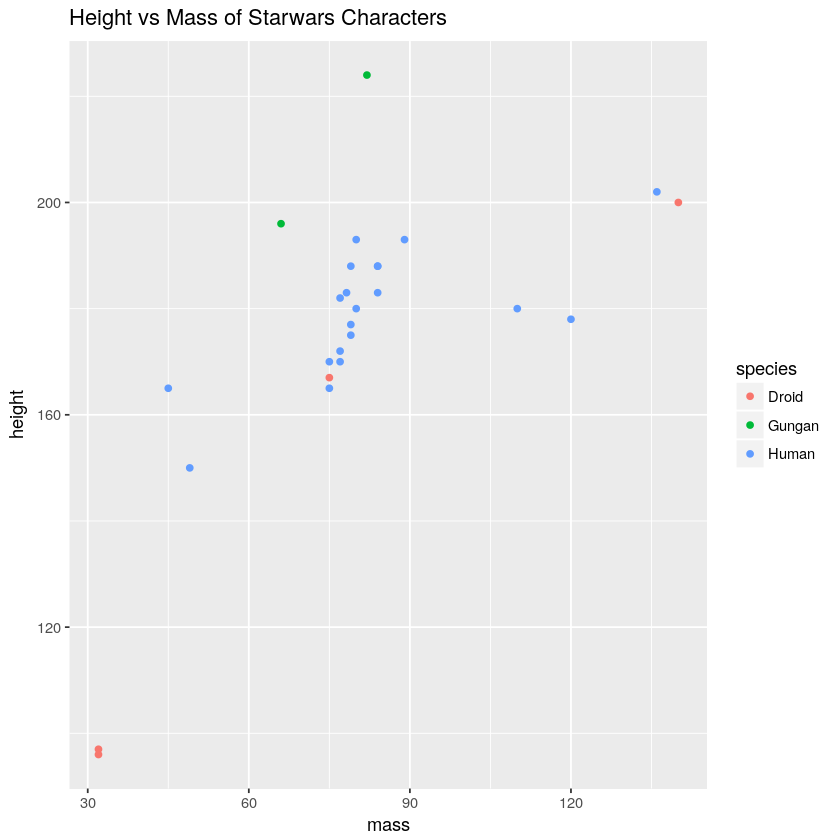

In [60]:
scatter + ggtitle("Height vs Mass of Starwars Characters")

Warning message:
“Removed 11 rows containing missing values (geom_point).”

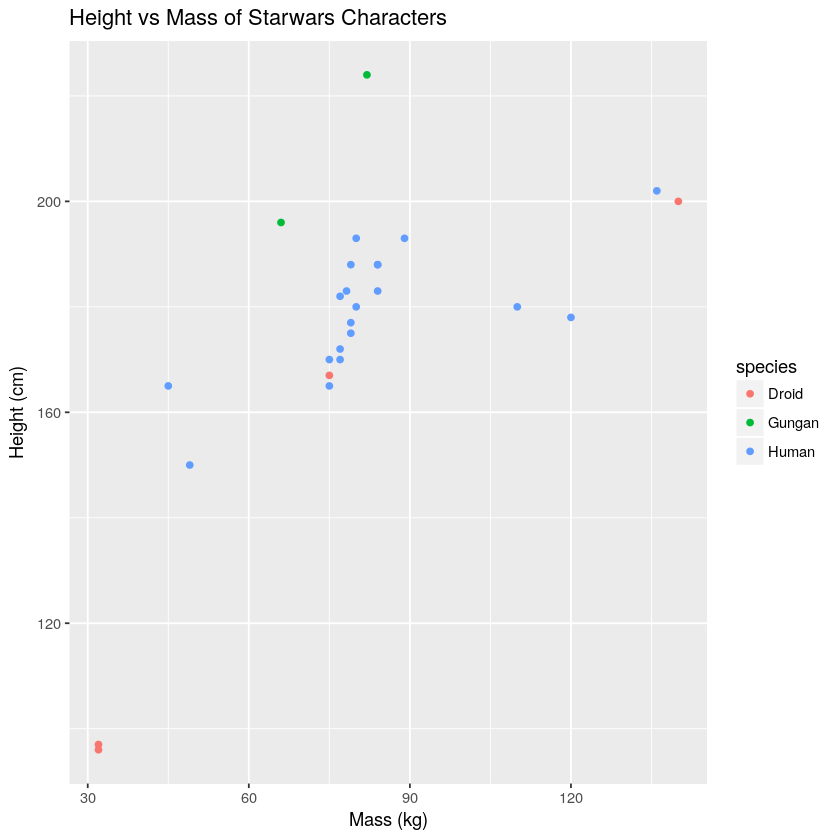

In [61]:
scatter + labs(title="Height vs Mass of Starwars Characters",
               x="Mass (kg)",y="Height (cm)")

Warning message:
“Removed 11 rows containing missing values (geom_point).”

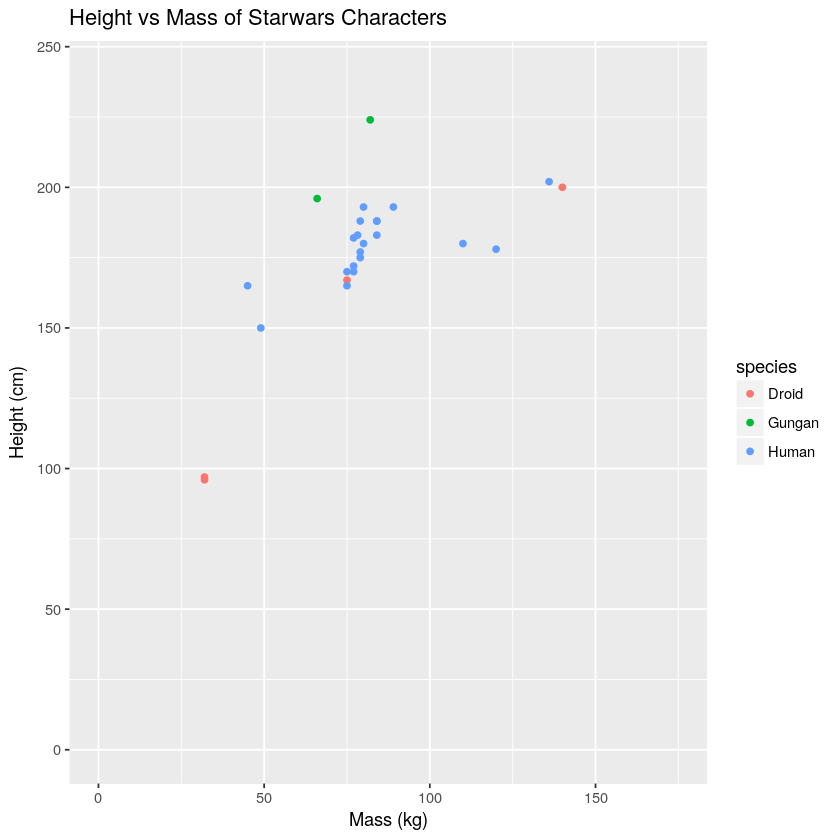

In [62]:
scatter + labs(title="Height vs Mass of Starwars Characters",
               x="Mass (kg)",y="Height (cm)") + xlim(0,175) + 
ylim(0,240) 

Warning message:
“Removed 11 rows containing missing values (geom_point).”

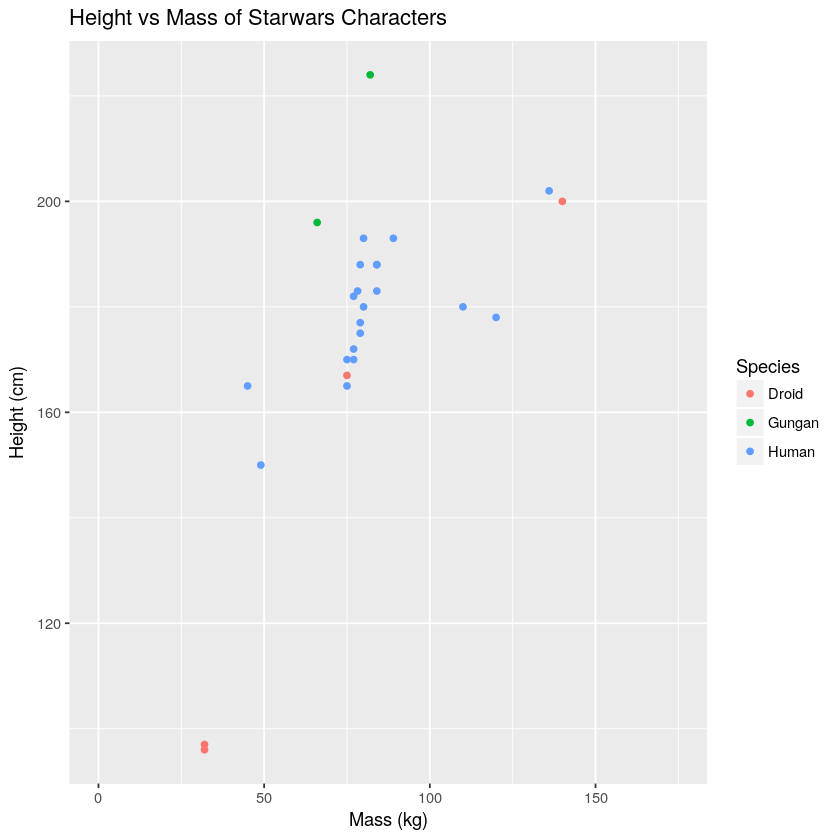

In [63]:
scatter + labs(title="Height vs Mass of Starwars Characters",
               x="Mass (kg)",y="Height (cm)") + xlim(0,175) +
guides(color=guide_legend(title="Species"))

Warning message:
“Removed 11 rows containing missing values (geom_point).”

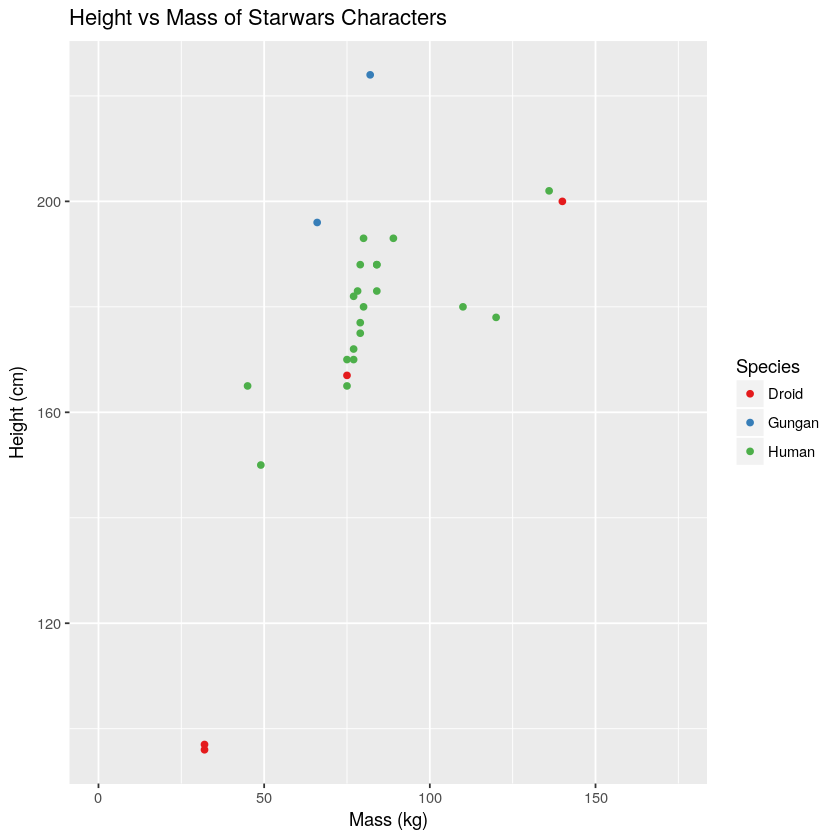

In [64]:
scatter + labs(title="Height vs Mass of Starwars Characters",
               x="Mass (kg)",y="Height (cm)") + xlim(0,175) +
guides(color=guide_legend(title="Species")) + 
scale_color_brewer(palette = "Set1")

## Themes
- Themes allow you to control things like font, gridline color, etc.
- The elements of the theme can be modified by using the `theme` function and passing the appropriate parameters
- More common is to download or use an existing theme, and add it to your plot using `+ theme_NAME`

Warning message:
“Removed 11 rows containing missing values (geom_point).”

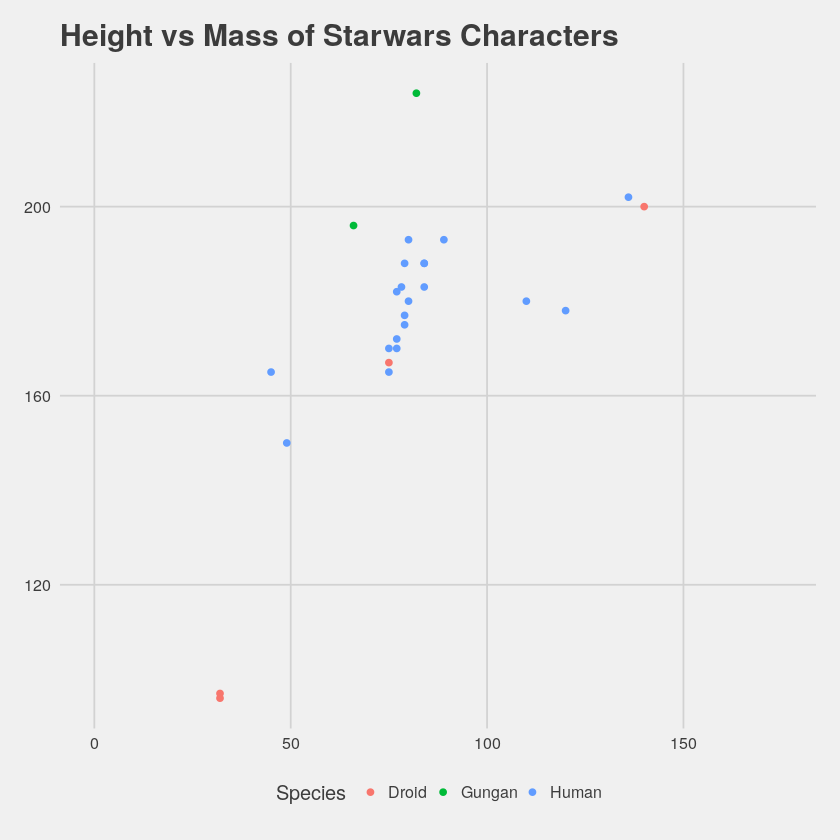

In [65]:
library(ggthemes)
almost_finished <- scatter + 
labs(title="Height vs Mass of Starwars Characters",
     x="Mass (kg)",y="Height (cm)") + 
xlim(0,175) + guides(color=guide_legend(title="Species"))
almost_finished + theme_fivethirtyeight()

Warning message:
“Removed 11 rows containing missing values (geom_point).”

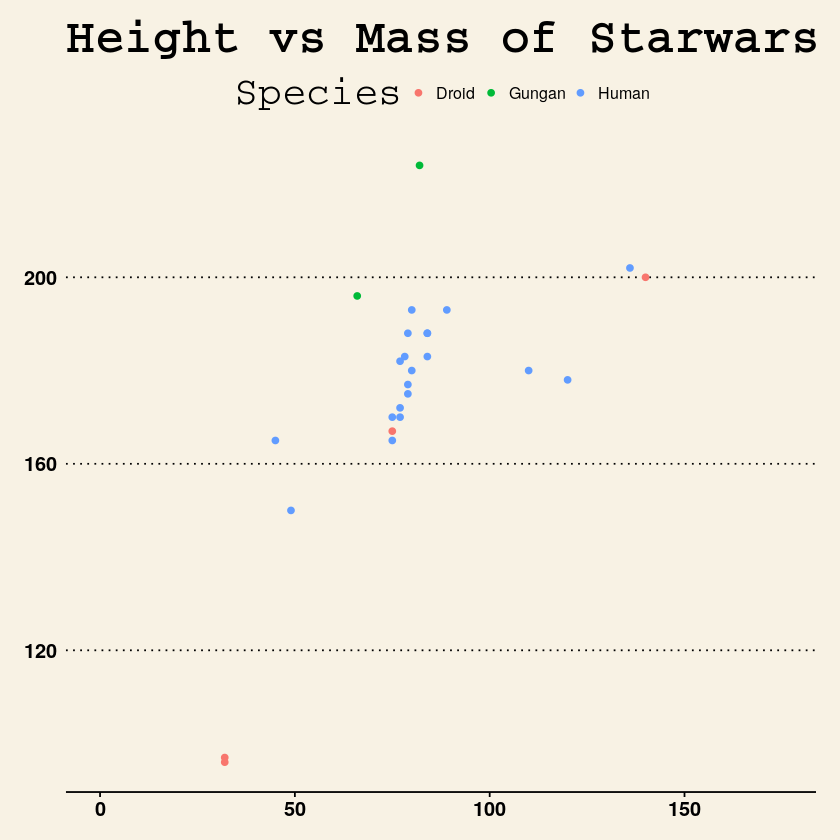

In [66]:
almost_finished + theme_wsj()

Warning message:
“Removed 11 rows containing missing values (geom_point).”

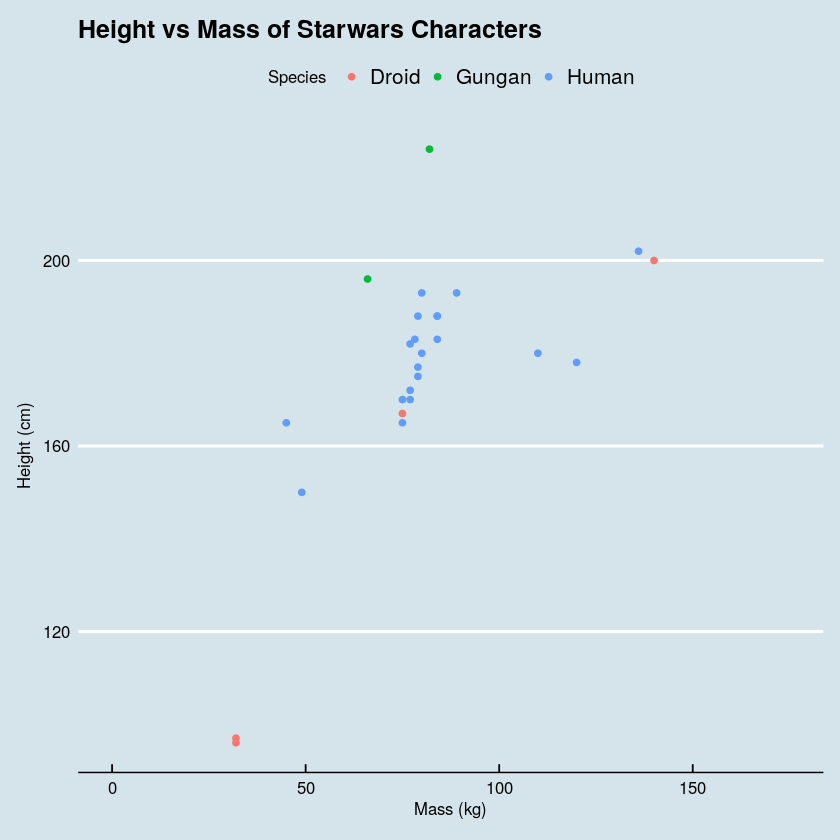

In [67]:
almost_finished + theme_economist()

Warning message:
“Removed 11 rows containing missing values (geom_point).”

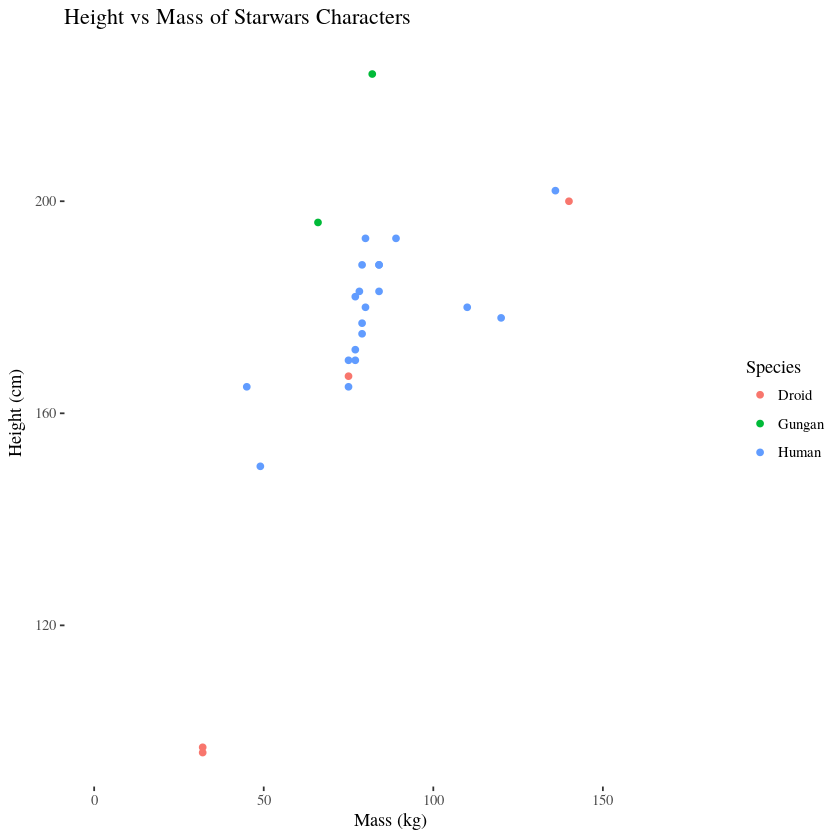

In [68]:
almost_finished + theme_tufte()

## Facet Grids
- Facet Grids allow us to create "mini" plots, per categorical variable

- After setting up your plot as your normally would, you add in the facet_grid()
```R
facet_grid(ROWS ~ COLUMNS)
```

Warning message:
“Removed 11 rows containing missing values (geom_point).”

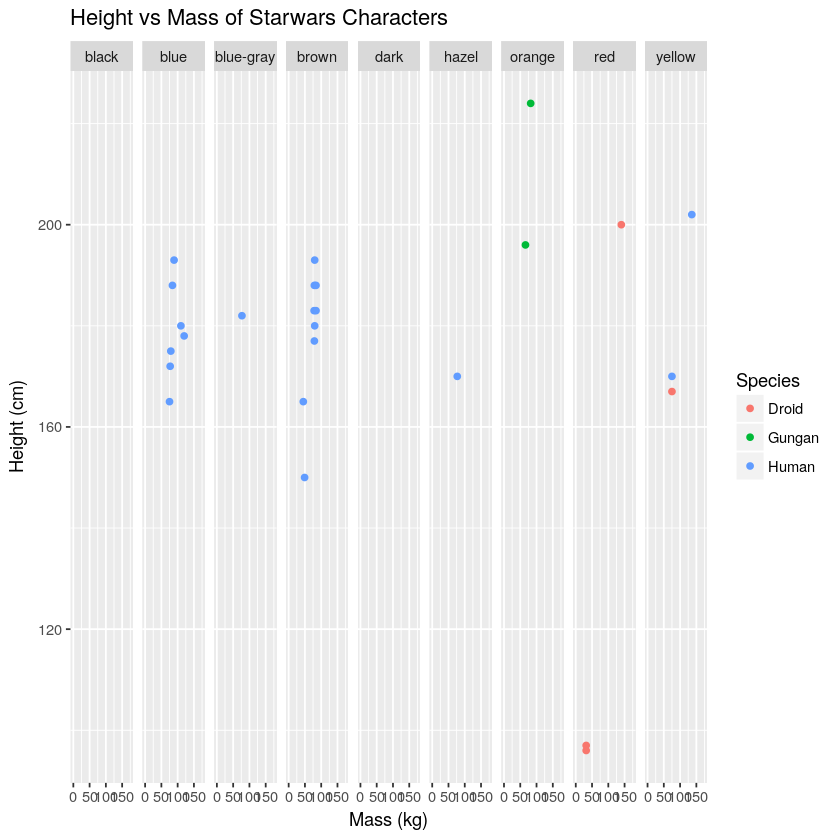

In [72]:
almost_finished + facet_grid(. ~ eye_color)

Warning message:
“Removed 11 rows containing missing values (geom_point).”

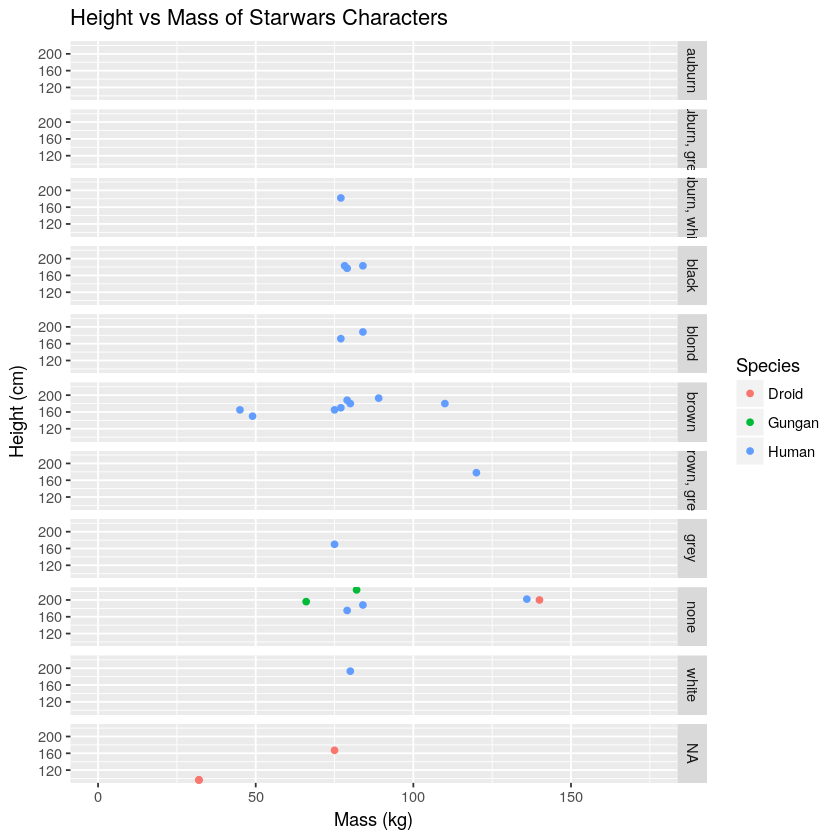

In [73]:
almost_finished + facet_grid(hair_color ~ .)

Warning message:
“Removed 11 rows containing missing values (geom_point).”

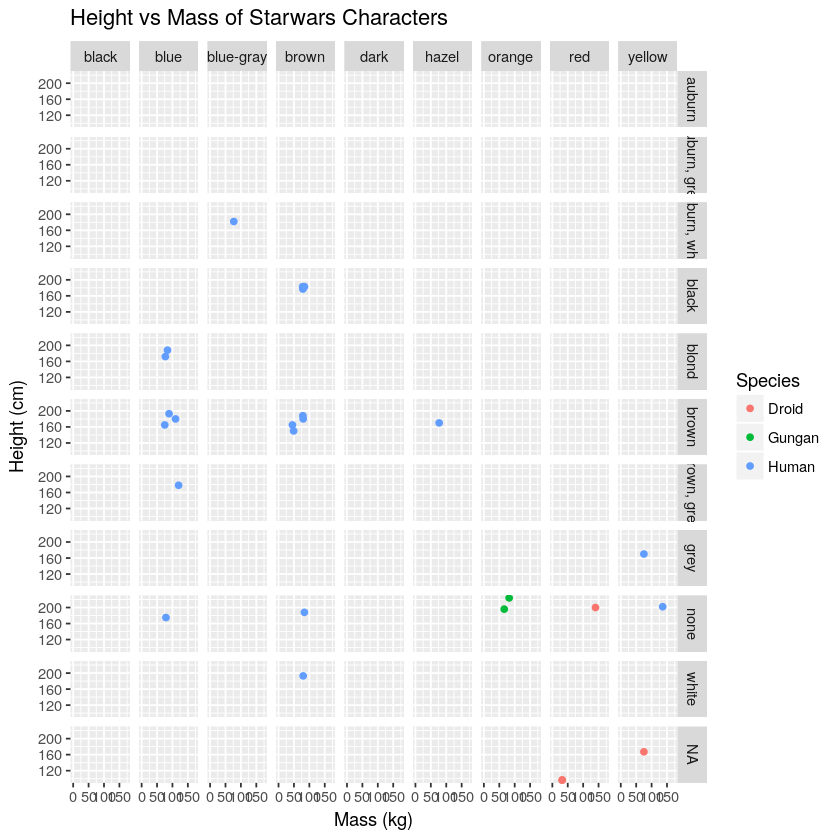

In [75]:
almost_finished + facet_grid(hair_color ~ eye_color)

## Saving Plots
- While gpplot2 is very easy to use in a good R IDE, many times we want to share our plots
- The `ggsave` function by default will save the last plot to a given file location
- The type of file is guessed from the name, but if you want to specify it, use the device parameter
```R
    ggsave(file_name, plot = plot_var)
```

In [21]:
my_final_plot <- almost_finished + theme_fivethirtyeight()
ggsave("final_plot.pdf",dpi=600,width=10)

Saving 10 x 6.67 in image
Warning message:
“Removed 29 rows containing missing values (geom_point).”